# 0. Google Colab Setup

In [1]:
import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
os.chdir('./drive/MyDrive/NLP MedLM project')

# 1.Process MedQuAD data
+ For MedQuAD we truncate the answer length to be 300, cause according to our reference research paper, the most important information is contained within the first 300 words.
+ Use 80%-20% split percentage to generate training and test dataset.

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import ast

from sklearn.model_selection import train_test_split

In [8]:
# read data
MED_PATH = './dataset/MedQuAD.csv'

med_df = pd.read_csv(MED_PATH)
med_df.head(3)

,Question,Answer,Focus
0,What is (are) Adult Acute Lymphoblastic Leukem...,Adult acute lymphoblastic leukemia (ALL) is ...,Adult Acute Lymphoblastic Leukemia
1,What are the symptoms of Adult Acute Lymphobla...,"Signs and symptoms of adult ALL include fever,...",Adult Acute Lymphoblastic Leukemia
2,How to diagnose Adult Acute Lymphoblastic Leuk...,Tests that examine the blood and bone marrow a...,Adult Acute Lymphoblastic Leukemia


In [10]:
med_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16407 entries, 0 to 16406
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Question  16407 non-null  object
 1   Answer    16407 non-null  object
 2   Focus     16393 non-null  object
dtypes: object(3)
memory usage: 384.7+ KB


## 1.1 Check answer and question-answer pair length

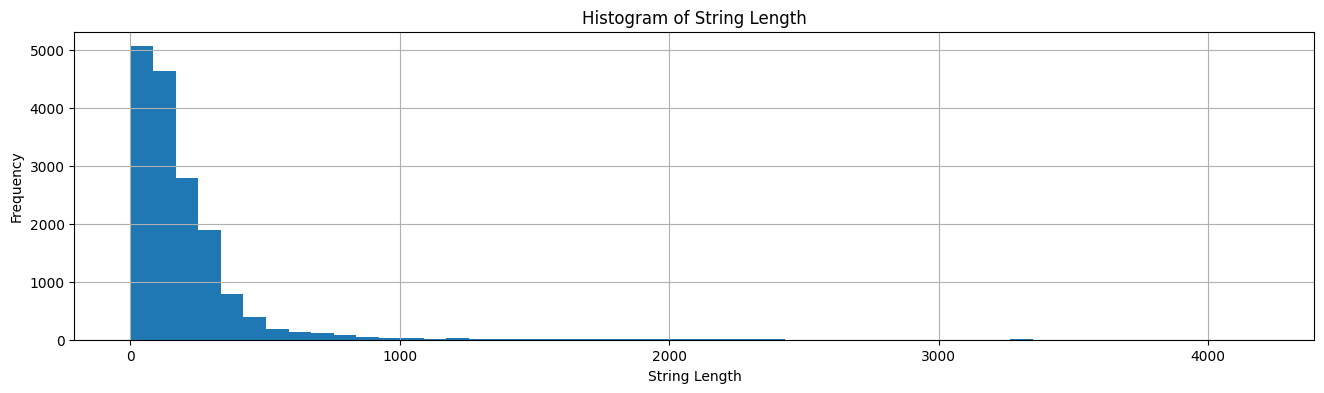

In [11]:
# check answer length distribution -> most within 1000 words
def cnt(row):
  return len(row.split())

med_df['ans_length'] = med_df['Answer'].apply(cnt)

plt.figure(figsize = (16,4))
plt.hist(med_df['ans_length'], bins=50)
plt.xlabel('String Length')
plt.ylabel('Frequency')
plt.title('Histogram of String Length')
plt.grid(True)
plt.show()

In [12]:
# turncate answer to have max length of 300 words
# but keep the original answer incase we have further usage
MAX_LENGTH = 300
def truncate(row):
  split_answer = row.split()
  return ' '.join(split_answer[:300])
med_df['Answer_cut'] = med_df['Answer'].apply(truncate)

med_df.head(3)

,Question,Answer,Focus,ans_length,Answer_cut
0,What is (are) Adult Acute Lymphoblastic Leukem...,Adult acute lymphoblastic leukemia (ALL) is ...,Adult Acute Lymphoblastic Leukemia,416,Adult acute lymphoblastic leukemia (ALL) is a ...
1,What are the symptoms of Adult Acute Lymphobla...,"Signs and symptoms of adult ALL include fever,...",Adult Acute Lymphoblastic Leukemia,117,"Signs and symptoms of adult ALL include fever,..."
2,How to diagnose Adult Acute Lymphoblastic Leuk...,Tests that examine the blood and bone marrow a...,Adult Acute Lymphoblastic Leukemia,434,Tests that examine the blood and bone marrow a...


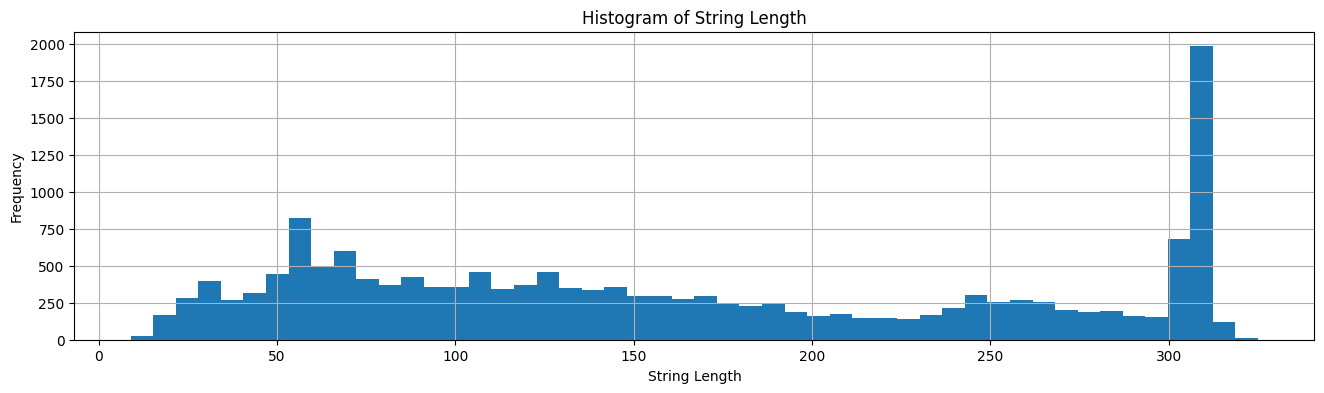

In [13]:
# check qa pair length after truncate answer
med_df['QA'] = med_df['Question'].str.cat(med_df['Answer_cut'], sep=' ')
med_df['qa_length'] = med_df['QA'].apply(cnt)

plt.figure(figsize = (16,4))
plt.hist(med_df['qa_length'], bins=50)
plt.xlabel('String Length')
plt.ylabel('Frequency')
plt.title('Histogram of String Length')
plt.grid(True)
plt.show()

## 1.2 Check QA focus/topic distribution
+ There are too many topics with too few samples, thus it is inappropriate to use it as the stratify feature while generating the dataset.

In [14]:
# get rid of NaN focus rows
med_df = med_df[med_df['Focus'].notnull()]

In [15]:
# check each focus's distribution -> cannot use it as stratification feature
cnt_focus = med_df['Focus'].value_counts()
display(cnt_focus)

Focus
Breast Cancer                                 53
Prostate Cancer                               43
Stroke                                        35
Skin Cancer                                   34
Alzheimer's Disease                           30
                                              ..
Cone-rod dystrophy X-linked 2                  1
Cone-rod dystrophy amelogenesis imperfecta     1
Cone-rod dystrophy 6                           1
Cone-rod dystrophy 2                           1
Rh deficiency syndrome                         1
Name: count, Length: 5125, dtype: int64

## 1.3 Generate training and test dataset

In [16]:
columns_to_store = ['Question', 'Answer', 'Answer_cut']
med_df2 = med_df[columns_to_store]

In [17]:
# split and store
dummy_labels = pd.Series(np.random.randint(2, size=len(med_df)))

train, test, _, _ = train_test_split(med_df2,
                    dummy_labels,
                    test_size = 0.2,
                    random_state = 123)

In [18]:
train.to_csv("./dataset/MedQuAD_train.csv", index = False)
test.to_csv('./dataset/MedQuAD_test.csv', index = False )

In [24]:
train.loc[1391]

Question                                 Is CADASIL inherited ?
Answer        How is CADASIL inherited? CADASIL is inherited...
Answer_cut    How is CADASIL inherited? CADASIL is inherited...
Name: 1391, dtype: object

# 1.4

# 2. Process iCliniq Data
+ The total answer length for iCliniq dataset is shorter than the MedQuAD dataset, with most of answers within length of 600 hundreds.
+ Process the iCliniq dataset with the same MAX_LENTH setting as the MedQuAD dataset and store it in the new column "Answer_cut".

In [ ]:
ICLINIQ_PATH = './dataset/iCliniq.csv'

ic_df = pd.read_csv(ICLINIQ_PATH)
ic_df.head(3)

,Unnamed: 0,Question,Answer,Tag
0,0,my 5 1/2-year-old son displays adhd symptoms f...,adhd and bipolar mood disorder (bmd) can coexi...,['attention deficit hyperactivity disorder']
1,1,my son has add and mild autism. he has been su...,stimulants in general tend to decrease appetit...,"['autism', 'weight loss']"
2,2,my son is 13 and is depressed. he has been tak...,while any of the stimulant medications can inc...,[]


In [ ]:
# get rid of the index column
ic_df = ic_df.drop(['Unnamed: 0'], axis = 1)

In [ ]:
ic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29752 entries, 0 to 29751
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Question    29752 non-null  object
 1   Answer      29752 non-null  object
 2   Tag         29752 non-null  object
 3   Answer_cut  29752 non-null  object
 4   QA          29752 non-null  object
 5   qa_length   29752 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 1.4+ MB


## 2.1 Check answer and QA pair length distribution

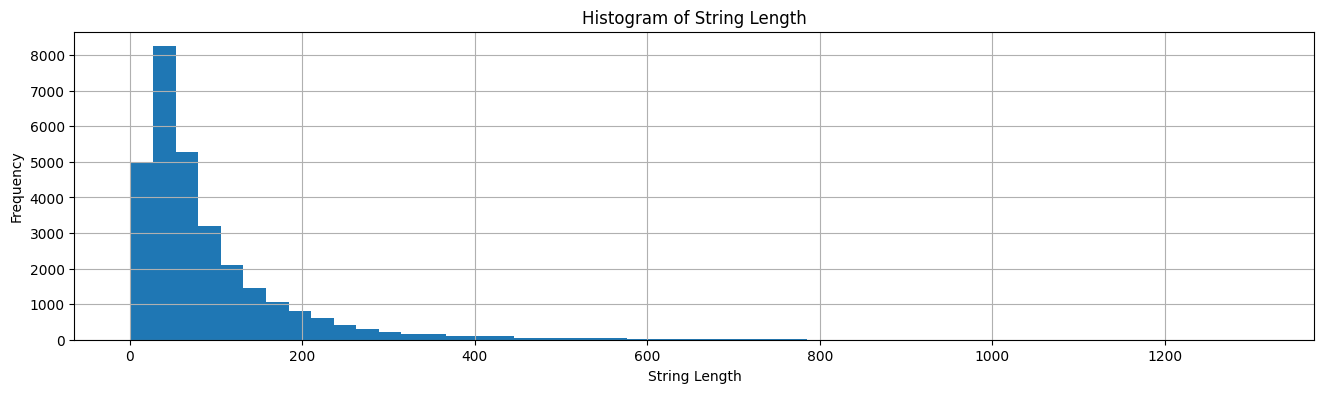

In [ ]:
def cnt(row):
  return len(row.split())
ic_df['ans_length'] = ic_df['Answer'].apply(cnt)

plt.figure(figsize = (16,4))
plt.hist(ic_df['ans_length'], bins=50)
plt.xlabel('String Length')
plt.ylabel('Frequency')
plt.title('Histogram of String Length')
plt.grid(True)
plt.show()

In [ ]:
# truncate iCliniq answer with max length of 300 words
ic_df['Answer_cut'] = ic_df['Answer'].apply(truncate)
ic_df.head(3)

,Question,Answer,Tag,Answer_cut
0,my 5 1/2-year-old son displays adhd symptoms f...,adhd and bipolar mood disorder (bmd) can coexi...,['attention deficit hyperactivity disorder'],adhd and bipolar mood disorder (bmd) can coexi...
1,my son has add and mild autism. he has been su...,stimulants in general tend to decrease appetit...,"['autism', 'weight loss']",stimulants in general tend to decrease appetit...
2,my son is 13 and is depressed. he has been tak...,while any of the stimulant medications can inc...,[],while any of the stimulant medications can inc...


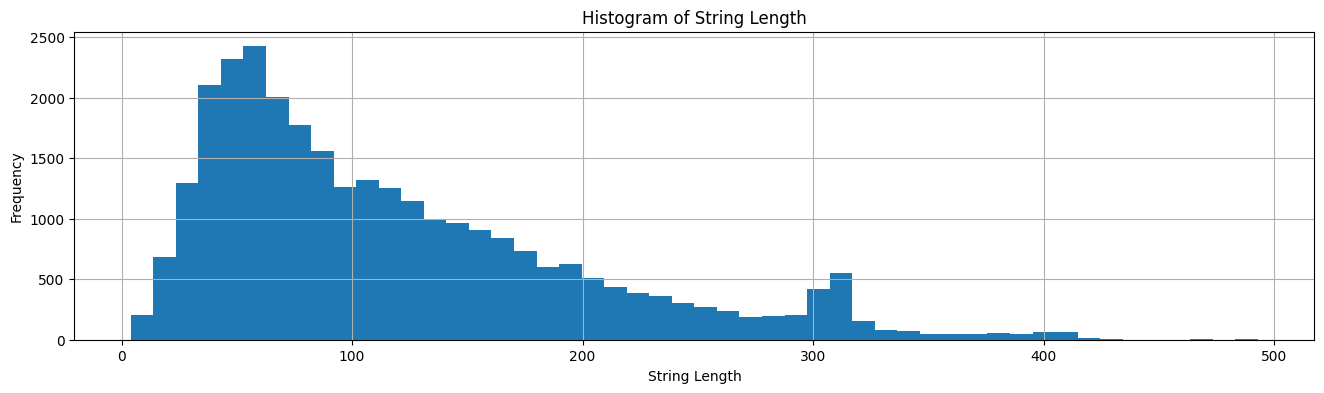

In [ ]:
# check the qa pair length after tunrcating the answer
ic_df['QA'] = ic_df['Question'].str.cat(ic_df['Answer_cut'], sep = ' ')
ic_df['qa_length'] = ic_df['QA'].apply(cnt)

plt.figure(figsize = (16,4))
plt.hist(ic_df['qa_length'], bins=50)
plt.xlabel('String Length')
plt.ylabel('Frequency')
plt.title('Histogram of String Length')
plt.grid(True)
plt.show()

## 2.2 Check iCliniq Topics

In [ ]:
def cnt_tag(row):
  return len(ast.literal_eval(row))
ic_df['num_tag'] = ic_df['Tag'].apply(cnt_tag)

ic_df['num_tag'].value_counts()

1     11256
2      5761
5      3793
3      3383
0      3335
4      2126
11       53
7        17
8        13
6        10
9         5
Name: num_tag, dtype: int64

In [ ]:
# check the distribution of each kind of text
ic_df['Tag'].value_counts()

[]                                                    3335
['pregnancy']                                          397
['exercise']                                           146
['drug overdose']                                      111
['shingles']                                           106
                                                      ... 
['food', 'coldness', 'fried chicken']                    1
['thigh', 'leg', 'pain', 'back pain', 'burn']            1
['burn', 'pain', 'urination', 'paranoid behavior']       1
['heart', 'ears', 'burn', 'head', 'pressure']            1
['fish', 'oil', 'rash']                                  1
Name: Tag, Length: 13391, dtype: int64

## 1.3 Generate training and test dataset

In [ ]:
# chose the columns that needs to be stored
ic_df2 = ic_df[columns_to_store]

In [ ]:
# split and store
dummy_labels = pd.Series(np.random.randint(2, size=len(ic_df2)))

train, test, _, _ = train_test_split(ic_df2,
                    dummy_labels,
                    test_size = 0.2,
                    random_state = 123)

In [ ]:
train.to_csv("./dataset/iCliniq_train.csv", index = False)
test.to_csv('./dataset/iCliniq_test.csv', index = False )

# 3. Combine MedQuAD and iCliniq and generate new dataset

In [ ]:
# concate two dataframe
cb_df = pd.concat([med_df2, ic_df2], ignore_index=True)
# shuffle the rows
shuffled_cb_df = cb_df.sample(frac=1).reset_index(drop=True)

In [ ]:
shuffled_cb_df.head(3)

,Question,Answer,Answer_cut
0,what does athlete's foot look like?,most cases of athlete's foot are barely notice...,most cases of athlete's foot are barely notice...
1,is it common to fail a pregnancy test yet be p...,it could also be the start of menopause.,it could also be the start of menopause.
2,10 yr. old son--blood-shot eye (right eye on o...,try some allergy eye drops you can get them at...,try some allergy eye drops you can get them at...


In [ ]:
# generate training and test dataset
dummy_labels = pd.Series(np.random.randint(2, size=len(shuffled_cb_df)))

train, test, _, _ = train_test_split(shuffled_cb_df,
                    dummy_labels,
                    test_size = 0.2,
                    random_state = 123)

In [ ]:
train.to_csv("./dataset/combined_train.csv", index = False)
test.to_csv('./dataset/combined_test.csv', index = False )